In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
from scipy import signal,ndimage

# LAB 9 - Matrix Operators, Invertability and Adjoints

## DUE: 15 March 2024 @ 11.59pm

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499

The purpose of this lab is to give you practice with investigating matrix operators, their invertibility and the use of adjoints in an inverse filtering process.

Note: You must show your numerical work, and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook! **Please include a PDF version of your assignment to help out the TA with the grading process.**

## Introduction

So far in class we have been looking at short, discrete filters $h[n]$ that are applied to a discritized input signal $x[n]$ to create an output $y[n]$. Normally, we have posed these as a discrete convolution "filtering" operation:

$$ y[n] = x[n] \otimes h[n]= \sum_{k=-\infty}^{\infty} x[k]h[n-k]. \tag{1}$$

However, because input and output $x[n]$ and $y[n]$ may be thought of as **vectors**, one can ask the question: what is it that connects two vectors through some operation? The answer is a **matrix**,

$${\bf y} = {\bf A}{\bf x},\tag{2}$$

where ${\bf x}$ and ${\bf y}$ are the input and output vectors, respectively, which leaves matrix ${\bf A}$ to be the **filtering operator**. (In fact, one can set up any convolution process as a matrix-vector operation!)  In this lab we are going to look at how we can: (1) set up a 1D Laplacian filter as a matrix for equal size input and output vectors; (2) use its **matrix inverse** to recover an estimate ${\bf x_{est}}$ of our original signal ${\bf x}$ from output ${\bf y}$; and (3) use this approach when the inputs and output are not of the same dimension!

## Q1: Constructing Matrix Operators

The goal of this question is to develop and apply $N\times N$ matrix $\mathbf{A}$ that computes an $\mathcal{O}(\Delta x^2)$ 1D Laplacian (i.e., a second-derivative) operator.  This can be posed as a **discrete convolution** of $x[n]$ with the following filter matrix operator:

$$h[n] = \sum_{k=-1}^{1} c[k] \delta[n-k], \tag{3}$$

where $c[-1]=c[1]=1$ and $c[0]=-2$ (all other values are zero). Your $N\times N$ filter should be a [tridiagonal matrix](https://en.wikipedia.org/wiki/Tridiagonal_matrix).

**(Q1-1)**  Assuming that $N=21$, construct the $N\times N$ matrix $\mathbf{A}$ representing the 1D Laplacian [finite-difference stencil](https://en.wikipedia.org/wiki/Finite_difference_coefficient) above. Illustrate your matrix by plotting it with *plt.imshow* and including a colorbar so that you can demonstrate that you have the necessary coefficients. Your answer should have a $c[0]=-2$ along the main diagonal, $c[1]=1$ along the first superdiagonal, and $c[-1]=1$ along the first subdiagonal (read about [matrix diagonals](https://en.wikipedia.org/wiki/Diagonal#Matrices) here).

Text(0.5, 1.0, 'Matrix A')

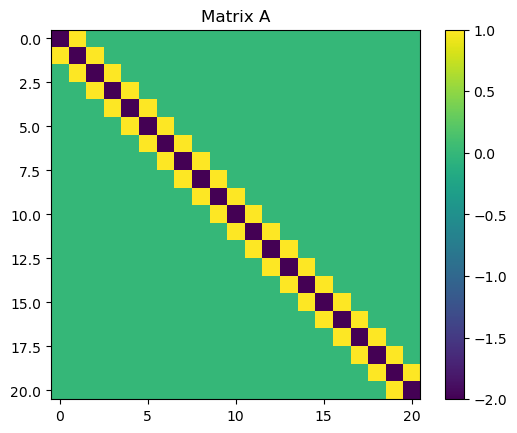

In [2]:
## . . Your answer here
#declare A
N=21
A=np.diag(-2*np.ones(N)) + np.diag(np.ones(N-1), 1) + np.diag(np.ones(N-1), -1)

#plot A
plt.imshow(A)
plt.colorbar()
plt.title("Matrix A")

**(Q1-2)** Let's now create a test data vector $\mathbf{x_1}$ of dimension $21\times 1$ defined by:

$$x_1[n] = \delta[n-10], \quad 0\le n \lt 21. \tag{4} $$

Compute the output $\mathbf{y_1}$ resulting from applying convolutional matrix $\mathbf{A}$ to test data vector $\mathbf{x_1}$. That is, compute

$$\mathbf{y_1} = \mathbf{A} \mathbf{x_1}.\tag{5}$$  

Use the command [*np.dot(A,x)*](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.dot.html) or the @ symbol to compute the matrix-vector multiplication.  Make a plot showing an overlay of the input and output arrays, $\mathbf{x_1}$ and $\mathbf{y_1}$, respectively.

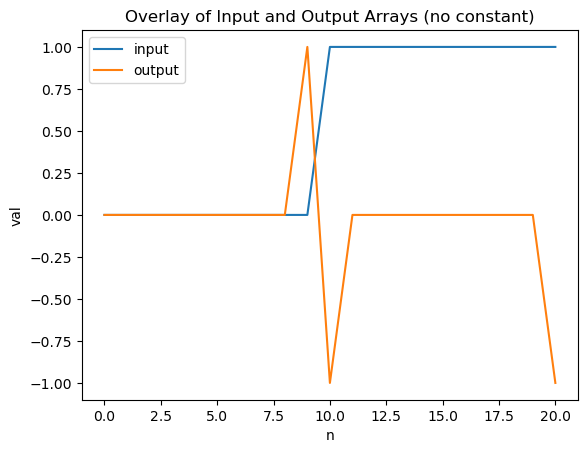

In [3]:
## . . Your answer here
x1=np.zeros(N)
for i in range(10, N):
    x1[i]=1

y1=np.dot(A,x1)

plt.plot(x1, label='input')
plt.plot(y1, label='output')
plt.xlabel('n')
plt.ylabel('val')
plt.title('Overlay of Input and Output Arrays (no constant)')
plt.legend()
plt.show()

**(Q1-3)** Let's now redefine our input function $\mathbf{x_2}$ by adding a constant 

$$x_2[n] = 1 + \delta[n-10], \quad 0\le n \lt 21. \tag{6} $$

Let's compute 

$$\mathbf{y_2} = \mathbf{Ax_2}.\tag{7}$$  

Make a plot of $\mathbf{x_2}$ and $\mathbf{y_2}$.  What do you notice about the end values of $\mathbf{y_2}$ compared to $\mathbf{y_1}$? How does this relate to the structure of your operator from **Q1-1**?

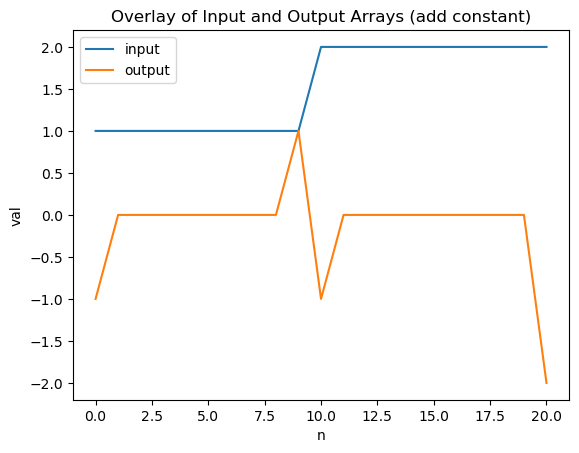

In [4]:
## . . Your answer here
x2=np.zeros(N)
for i in range(0, N):
    if i<10:
        x2[i]=1
    else:
        x2[i]=2

y2=np.dot(A,x2)

plt.plot(x2, label='input')
plt.plot(y2, label='output')
plt.xlabel('n')
plt.ylabel('val')
plt.title('Overlay of Input and Output Arrays (add constant)')
plt.legend()
plt.show()

The end values for $y_2$ are more negative than the end values for $y_1$. Additionaly, at the end of $y_2$ our values reach an absolute minimum (based on the plot) where as the end of $y_1$ reaches a shared-local minimum. We see that the overall relationship between our output and operator remains the same by examining the behavior of our plot. We see that there is still a spike at $n=10$, as expected, as our output values stray from $0$. 

**(Q1-4)**  Let's look at modifying the edges so that we do not get non-zero gradient at the boundaries. Now make an $21\times 1$ array $\mathbf{b}$ that is all zeros, expect for $b[0]=b[20]=1$.  Now evaluate the system by solving:

$$\mathbf{y_3} = \mathbf{Ax_2}+\mathbf{b}.\tag{8}$$

Make a plot of $\mathbf{y_3}$ and $\mathbf{x_2}$. Does your filtering operation now make more sense? Comment as to why this is.

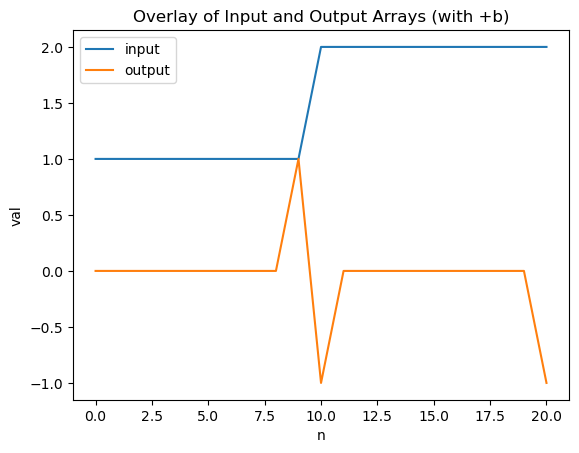

In [5]:
## . . Your answer here
b=np.zeros(N)
b[0]=1
b[20]=1

y3=np.dot(A,x2) + b

plt.plot(x2, label='input')
plt.plot(y3, label='output')
plt.xlabel('n')
plt.ylabel('val')
plt.title('Overlay of Input and Output Arrays (with +b)')
plt.legend()
plt.show()

This filertering operation does make more sense because by using $b$ we are preventing our operation from causing steep-negative changes at our boundary.

**(Q1-5)**  Let's now look at whether we can recover our original $\mathbf{x_1}$ from $\mathbf{y_1}$.  Compute the inverse of your filtering matrix $\mathbf{A}$ (i.e., $\mathbf{A^{-1}}$) using the [*linalg.inv*](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.linalg.inv.html) routine.  Plot an image of $\mathbf{A^{-1}}$ using the *plt.imshow* command (include a colorbar).  What do you notice about the structure of matrix $\mathbf{A^{-1}}$ relative to $\mathbf{A}$?

Text(0.5, 1.0, 'Inverse A')

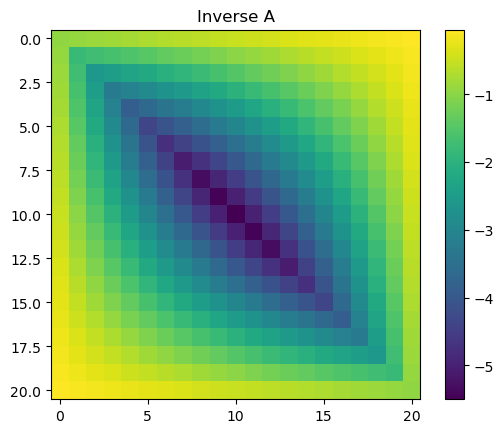

In [6]:
## . . Your answer here
invA=linalg.inv(A)

plt.imshow(invA)
plt.colorbar()
plt.title("Inverse A")

I see that there still seems to be a diagonal aspect to the matrix. Specifically, we see that the center diagonal has the most negative values and as we head away from this diagonal, the values become more and more positive and the behavior on either end of the diagonal mirrors itself. Think of it like this, if we take the upper-triangular matrix and flip it along the diagonal (kind of like folding two diagonal corners of a paper together), we would get the lower-triangular matrix.

**(Q1-6)**  Let's now recover an estimate of the original data set $\mathbf{x^{est}_1}$ from $\mathbf{y_1}$.  Do this by applying:

$$\mathbf{x^{est}_1} = \mathbf{A^{-1}}\mathbf{y_1}. \tag{9}$$
 
How well does $\mathbf{x^{est}_1}$ match your original signal $\mathbf{x_1}$?  Compute the following error term (i.e., normalized by the energy in the signal):

$$\epsilon^2 = 
\frac{\sum_{n=0}^{20}\left(x_1^{est}[n]-x_1[n])\right)^2}{\sum_{n=0}^{20}\left(x_1[n]\right)^2}.\tag{10}
$$

Comment on the quality of your inverse filtering result.

In [7]:
## . . Your answer here
xEST1=np.dot(invA, y1)
sumN=0
sumD=0
for i in range(0,21):
    sumN+= (xEST1[i]-x1[i])**2
    sumD+= x1[i]**2

error1=sumN/sumD
print("The error is: ", error1)

The error is:  1.5497082839782094e-30


We see that our error value is incredibly small, this suggests that our inverse filtering result is highly accurate.

**(Q1-7)**  Let's now do the same for $\mathbf{y_2}$ and $\mathbf{x_2}$. Recover an estimate of the original data set $\mathbf{x^{est}_2}$ from $\mathbf{y_2}$.  Do this by applying:

$$\mathbf{x^{est}_2} = \mathbf{A^{-1}}\mathbf{y_2}. \tag{11}$$
 
How well does $\mathbf{x^{est}_2}$ match your original signal $\mathbf{x_2}$?  Compute the following error term:

$$\epsilon^2 = 
\frac{\sum_{n=0}^{20}\left(x_2^{est}[n]-x_2[n])\right)^2}{\sum_{n=0}^{20}\left(x_2[n]\right)^2}.\tag{12}
$$

Comment on the quality of your inverse filtering result.

In [8]:
## . . Your answer here
xEST2=np.dot(invA, y2)
sumN2=0
sumD2=0
for i in range(0,21):
    sumN2+= (xEST2[i]-x2[i])**2
    sumD2+= x2[i]**2

error2=sumN2/sumD2
print("The error is: ", error2)

The error is:  6.585253795030726e-31


We see that our error value is incredibly small, this suggests that our inverse filtering result is highly accurate.

**(Q1-8)**  Finally, let's now do the same for $\mathbf{y_3}$ where we also include the $\mathbf{b}$ vector contributions. Recover an estimate of the original data set $\mathbf{x^{est}_3}$ from $\mathbf{y_3}$.  Do this by applying:

$$\mathbf{x^{est}_3} = \mathbf{A^{-1}}(\mathbf{y_3}-\mathbf{b}). \tag{13}$$
 
How well does $\mathbf{x^{est}_3}$ match your original signal $\mathbf{x_2}$?  Compute the following error term:

$$\epsilon^2 = 
\frac{\sum_{n=0}^{20}\left(x_3^{est}[n]-x_2[n])\right)^2}{\sum_{n=0}^{20}\left(x_2[n]\right)^2}.\tag{14}
$$

Comment on the quality of your inverse filtering result.

In [9]:
## . . Your answer here
xEST3=np.dot(invA, (y3-b))
sumN3=0
sumD3=0
for i in range(0,21):
    sumN3+= (xEST3[i]-x2[i])**2
    sumD3+= x2[i]**2

error3=sumN3/sumD3
print("The error is: ", error3)

The error is:  6.585253795030726e-31


We see that our error value is incredibly small, this suggests that our inverse filtering result is highly accurate.

## Q2: Weighted Adjoint Filtering with non-square Matrices

Let's now look at a case where our filtering matrix $\mathbf{B}$ is not square (i.e., $M\times N$ where $M\neq N$) using a 1D smoothing operator operator given by:

$$h[n] = \delta[n]+e^{-\sigma}\delta[n-1]+e^{-2\sigma}\delta[n-2]+e^{-3\sigma}\delta[n-3]+e^{-4\sigma}\delta[n-4]. \tag{15}$$

**(Q2-1)**  The first step is to construct a matrix ${\bf B}$ that is of dimension (row times column) $M\times (M+4)$.  Let's again use M=21.  Hint: The first row of your matrix should be

$$(1,e^{-\sigma},e^{-2\sigma},e^{-3\sigma},e^{-4\sigma},0,0,0,...,0,0). \tag{16a}$$

The second row should be:

$$(0,1,e^{-\sigma},e^{-2\sigma},e^{-3\sigma},e^{-4\sigma},0,0,...,0,0). \tag{16b}$$

your third row .... etc

Choose a value of $\sigma$ between 0.25 and 0.75. Generate an image of your filtering matrix $\mathbf{B}$ using *plt.imshow*.

Text(0.5, 1.0, 'B')

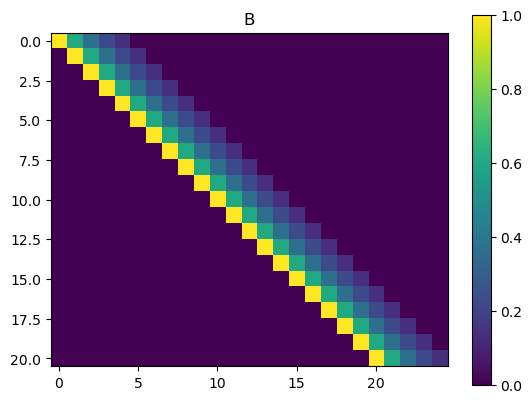

In [10]:
## . . Your answer here
M=21
sigma=0.5
B=np.diag(np.ones(M+4)) + np.diag(np.exp(-sigma)*np.ones(M+3),1)+ \
    np.diag(np.exp(-2*sigma)*np.ones(M+2),2) + \
    np.diag(np.exp(-3*sigma)*np.ones(M+1),3) + \
    np.diag(np.exp(-4*sigma)*np.ones(M),4)
#I think this is the right way to do it, since we shift values over one everytime and
# we don't have a square matrix, the corner values along the diagonal shouldn't match
B=B[:-4]
plt.imshow(B)
plt.colorbar()
plt.title("B")



**(Q2-2)**  Let's now create data matrix of dimensions $(M+4)\times 1 = 25\times 1$.  Let's define it as the following:

$$x[n] = \left\{
\begin{array}{cc}
1,  & n=6\\
-1, & n=15 \\
0 , & otherwise  \\
\end{array}
\right.\tag{17}
$$

Now compute the dot product between the smoothing filtering matrix $\mathbf{B}$ defined in **Q2-1** and $\mathbf{x}$:

$$\mathbf{y} = \mathbf{Bx}. \tag{18}$$

Make a plot of the output $\mathbf{y}$.  You will notice that whereas the input has $M+4=25$ values, the output has $M=21$ values.  Comment on the **causality** and **stability** of the system.

Text(0, 0.5, 'val')

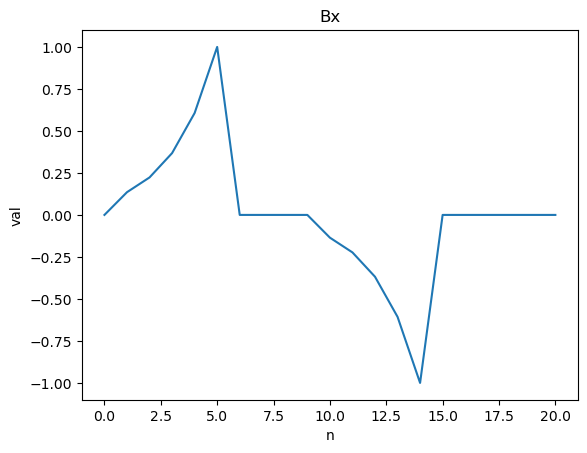

In [11]:
##for 6, 15 not sure If I need to account for indexing, I am going to 
x=np.zeros(M+4)
x[5]=1
x[14]=-1
y=np.dot(B, x)
plt.plot(y)
plt.title("Bx")
plt.xlabel("n")
plt.ylabel("val")

We see that the system is **casual** by looking at our $h [ n ]$ and seeing that for $n<0$, our value is always $0$ since each $\delta$ function will produce $0$, since no temporal index is $0$. 

We see that the system is **stable** by looking at both our $Bx$ plot and the definition of our filtering matrix. We see that the plot (which is our output sequence) is bounded between $-1$ and $1$, which is how our $x$ input-sequence is bounded. 
Additionaly, our filter $B$ is bounded between the values of $0$ and $1$.

**(Q2-3)** We are now looking to recover an estimate of our original data; however, because $\mathbf{B}$ is not square we are unable to directly compute the inverse.  (Another reason why we sometimes may not be able to do so is that $\mathbf{A}$ could be so large that we are not able to actually calculate the inverse on our computers for a lack of computer memory!)

Let's first look at an approximate way of computing an estimate $\mathbf{x^{est}}$ from $\mathbf{y}$.  The [**matrix adjoint**](https://en.wikipedia.org/wiki/Conjugate_transpose) operator $\mathbf{B^T}$ is formed by taking the (complex) transpose of $\mathbf{B}$.  Note that the adjoint operation takes the $M\times N$ matrix and makes it $N\times M$.  Because the dimensions of $\mathbf{y}$ are $M\times 1$ one can directly apply 

$$\mathbf{x^{est}_{Adj}} = \mathbf{B^T}y, \tag{19}$$

where the subscript $Adj$ emphasizes that this is the **adjoint** approximation of the **inverse**. Compute and show the adjoint approximation here.  

Comment on (1) how well $\mathbf{x^{est}_{Adj}}$ reconstructs the original signal $\mathbf{x}$ and (2) the **causality** of the output.

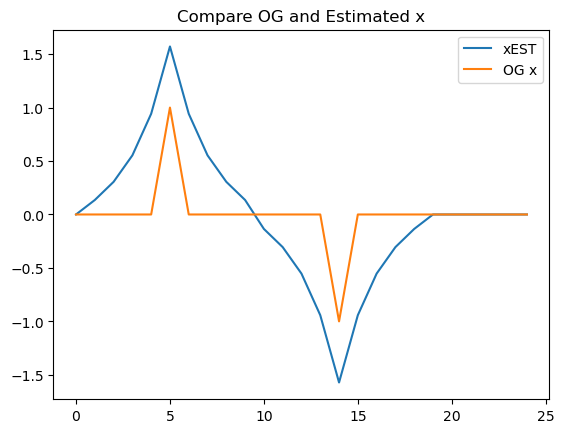

In [12]:
## . . Your answer here
xEA= np.dot(np.transpose(B),y)
plt.plot(xEA, label="xEST")
plt.plot(x, label="OG x")
plt.title("Compare OG and Estimated x")
plt.legend()

We see that it does not reconstruct the signal well. The estimated $x$ captures the peaks in the original $x$, however it does not capture the zero values, and its peaks are larger than the originals.
We see that this does not impact the causality, and that our signal is still **casual**. 

**(Q2-4)** Let's now investigate if we can do a bit better in scaling the amplitudes.  One way to do this is to form the **Hessian Matrix**

$$\mathbf{H} = \mathbf{B^T B}, \tag{20}$$

which is a square matrix of dimensions $(M+4)\times(M+4)$.  Compute the Hessian matrix and use *plt.imshow* to illustrate the Hessian matrix.  

Let's now extract the **main diagonal** of the Hessian matrix [HINT: if your Hessian matrix is called HESS, you can obtain the diagonal elements by *DIAG = HESS.diagonal()*].  This should be an array of dimension $M+4=25$. Let's now create a square **weight matrix** $\mathbf{W}$ (25x25) whose diagonal elements are equal to $DIAG[n]$.  Compute weight matrix $\mathbf{W}$ and plot using *plt.imshow*.

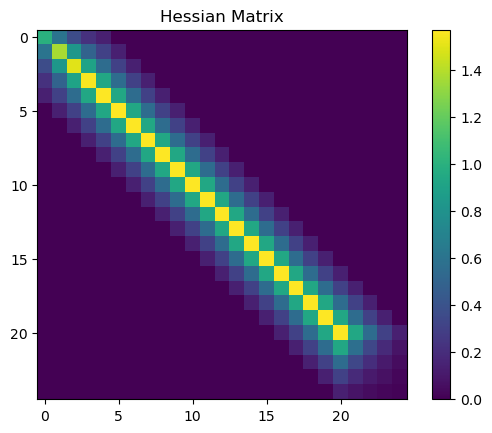

25


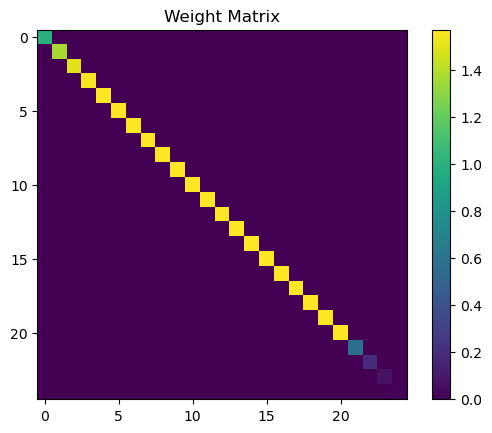

In [13]:
## . . Your answer here
H=np.dot(np.transpose(B),B)
plt.imshow(H)
plt.colorbar()
plt.title("Hessian Matrix")
plt.show()

diag=H.diagonal(0)
print(len(diag))

W=np.diag(diag)
plt.imshow(W)
plt.colorbar()
plt.title("Weight Matrix")
plt.show()

**(Q2-5)** Let's now examine how the weighting changes the amplitudes.  To illustrate this create a $2\times 2$ matrix of subplots showing:

*plt.subplot(221)*: $\mathbf{x}$

*plt.subplot(222)*: $\mathbf{y}$

*plt.subplot(223)*: $\mathbf{B^T y}$

*plt.subplot(224)*: $\mathbf{W^{-1}B^T y}$

How well has your weighting scheme improved your amplitudes?

Text(0.5, 1.0, 'Weighted x Estimate')

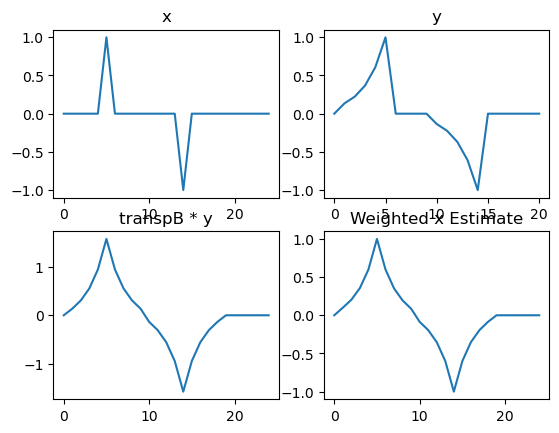

In [14]:
## . . Your answer here
plt.subplot(2,2,1)
plt.plot(x)
plt.title("x")

plt.subplot(2,2,2)
plt.plot(y)
plt.title("y")

plt.subplot(2,2,3)
plt.plot(xEA)
plt.title("transpB * y")

plt.subplot(2,2,4)
plt.plot(np.dot(np.linalg.inv(W), xEA))
plt.title("Weighted x Estimate")

The weighting scheme significantly improved our amplitudes. We see that the new amplitudes match that of our original signal.

**(Q2-6)** Finally, does the choice of $\sigma$ affect the weighted adjoint filtered results? Illustrate with an example and discuss.

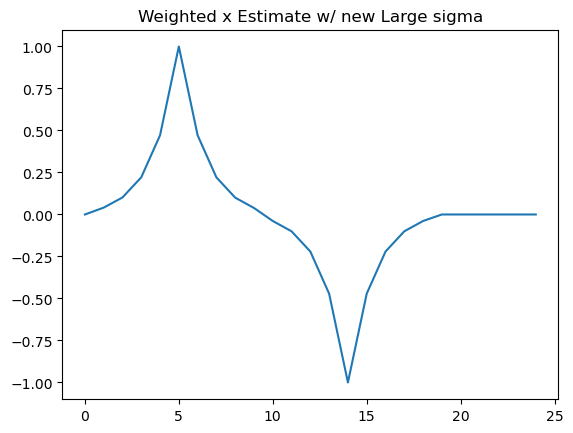

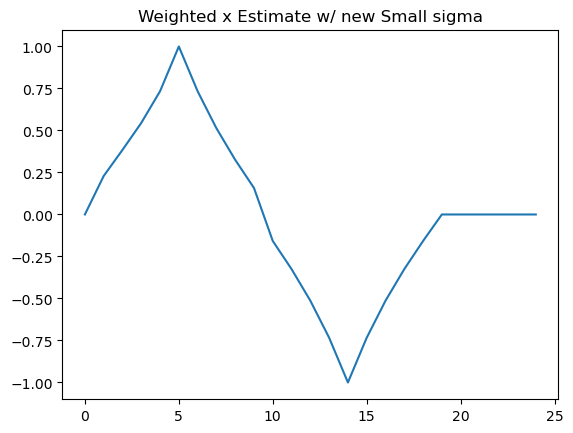

In [15]:
## . . Your answer here
sigma2=0.75
B2=np.diag(np.ones(M+4)) + np.diag(np.exp(-sigma2)*np.ones(M+3),1)+ \
    np.diag(np.exp(-2*sigma2)*np.ones(M+2),2) + \
    np.diag(np.exp(-3*sigma2)*np.ones(M+1),3) + \
    np.diag(np.exp(-4*sigma2)*np.ones(M),4)
B2=B2[:-4]
y2=np.dot(B2,x)
H2=np.dot(np.transpose(B2),B2)
diag2=H2.diagonal(0)
W2=np.diag(diag2)

plt.plot(np.dot(np.linalg.inv(W2), np.dot(np.transpose(B2), y2)))
plt.title("Weighted x Estimate w/ new Large sigma")
plt.show()

sigma3=0.25
B3=np.diag(np.ones(M+4)) + np.diag(np.exp(-sigma3)*np.ones(M+3),1)+ \
    np.diag(np.exp(-2*sigma3)*np.ones(M+2),2) + \
    np.diag(np.exp(-3*sigma3)*np.ones(M+1),3) + \
    np.diag(np.exp(-4*sigma3)*np.ones(M),4)
B3=B3[:-4]
y3=np.dot(B3,x)
H3=np.dot(np.transpose(B3),B3)
diag3=H3.diagonal(0)
W3=np.diag(diag3)

plt.plot(np.dot(np.linalg.inv(W3), np.dot(np.transpose(B3), y3)))
plt.title("Weighted x Estimate w/ new Small sigma")
plt.show()

We see that the smaller the sigma value the more overall smoothing our $x$ has gone through. It is interesting, the areas with the peaks are more similar with the smaller values of sigma, while the places we expect $x$ to be zero are more similar for the larger sigma value. I think, overall the larger values of sigma are better, I ran the code above with $\sigma=1$, and the result was much closer to the original $x$.